<a href="https://colab.research.google.com/github/Walilei/2020-Recommender-system/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
final = pd.read_csv("final.csv")

final

,index,user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,order_num,freq,reorder_ratio
0,0,1,0,0,0,5,0,0,13,0,0,0,0,0,1,3,0,13,2,0,22,0,0,10,19.555556,0.759259
1,1,2,17,0,2,36,0,3,9,0,0,0,1,1,11,3,1,48,0,0,42,21,0,14,15.230769,0.510989
2,2,3,6,0,0,38,0,0,3,0,4,0,0,0,4,0,0,21,1,0,9,2,0,12,12.090909,0.705128
3,3,4,3,0,2,2,2,0,3,0,0,0,0,0,0,0,1,0,2,0,1,2,0,5,13.750000,0.071429
4,4,5,2,0,0,19,0,2,0,0,1,0,0,0,2,0,1,8,0,0,1,1,0,4,13.333333,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206204,206205,2,0,2,7,0,0,1,0,0,0,0,1,0,0,0,14,0,1,0,3,1,3,20.000000,0.533333
206205,206205,206206,76,1,2,34,0,4,33,0,1,0,10,2,14,1,9,39,12,0,42,5,0,67,3.772727,0.480427
206206,206206,206207,21,0,3,50,0,1,20,0,8,0,0,6,15,4,11,52,0,1,23,8,0,16,14.333333,0.658291
206207,206207,206208,26,0,62,197,0,3,20,0,17,0,5,22,38,17,11,161,6,3,59,28,2,49,7.437500,0.720301


In [ ]:
final = final.drop(["index", "user_id", "order_num", "freq", "reorder_ratio"], axis=1)

final

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0,0,0,5,0,0,13,0,0,0,0,0,1,3,0,13,2,0,22,0,0
1,17,0,2,36,0,3,9,0,0,0,1,1,11,3,1,48,0,0,42,21,0
2,6,0,0,38,0,0,3,0,4,0,0,0,4,0,0,21,1,0,9,2,0
3,3,0,2,2,2,0,3,0,0,0,0,0,0,0,1,0,2,0,1,2,0
4,2,0,0,19,0,2,0,0,1,0,0,0,2,0,1,8,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,2,0,2,7,0,0,1,0,0,0,0,1,0,0,0,14,0,1,0,3,1
206205,76,1,2,34,0,4,33,0,1,0,10,2,14,1,9,39,12,0,42,5,0
206206,21,0,3,50,0,1,20,0,8,0,0,6,15,4,11,52,0,1,23,8,0
206207,26,0,62,197,0,3,20,0,17,0,5,22,38,17,11,161,6,3,59,28,2


In [ ]:
!pip3 install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feat_scaled = scaler.fit_transform(final)
feat_scaled = pd.DataFrame(feat_scaled)
feat_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05
mean,-2.613736e-15,7.890375e-16,8.189443e-16,3.335910e-16,1.910802e-16,-3.271583e-15,-9.146025e-17,-2.871530e-15,-1.861432e-15,-2.158993e-15,-3.890297e-15,-3.742501e-16,-1.304080e-15,-2.299391e-16,1.702912e-15,5.100409e-16,-2.574349e-15,-2.933453e-15,4.789314e-16,1.588015e-15,1.806773e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-5.782656e-01,-1.773280e-01,-5.051957e-01,-6.465970e-01,-1.239284e-01,-3.972069e-01,-5.195889e-01,-1.075820e-01,-5.247888e-01,-1.383171e-01,-4.084127e-01,-4.901467e-01,-6.485104e-01,-4.200687e-01,-5.360762e-01,-6.279026e-01,-4.057446e-01,-1.783496e-01,-5.138966e-01,-4.896301e-01,-2.395814e-01
25%,-5.249469e-01,-1.773280e-01,-5.051957e-01,-5.481362e-01,-1.239284e-01,-3.972069e-01,-4.797604e-01,-1.075820e-01,-5.247888e-01,-1.383171e-01,-4.084127e-01,-4.901467e-01,-5.772104e-01,-4.200687e-01,-5.360762e-01,-5.322404e-01,-4.057446e-01,-1.783496e-01,-4.404987e-01,-4.896301e-01,-2.395814e-01
50%,-3.649909e-01,-1.773280e-01,-3.281443e-01,-3.512145e-01,-1.239284e-01,-3.972069e-01,-3.204462e-01,-1.075820e-01,-3.999183e-01,-1.383171e-01,-4.084127e-01,-3.475762e-01,-3.633103e-01,-2.979918e-01,-3.290767e-01,-3.409160e-01,-2.924753e-01,-1.783496e-01,-3.304018e-01,-2.975422e-01,-2.395814e-01
75%,1.148771e-01,-1.773280e-01,2.595853e-02,9.889213e-02,-1.239284e-01,-9.300366e-02,3.801065e-02,-1.075820e-01,9.956385e-02,-1.383171e-01,-3.170037e-02,8.013537e-02,1.357898e-01,-5.383815e-02,8.492230e-02,8.956388e-02,-6.593667e-02,-1.783496e-01,3.658792e-02,8.663376e-02,-2.395814e-01
max,2.501469e+01,5.927076e+01,4.942330e+01,1.807503e+01,1.137716e+02,3.580298e+01,4.536289e+01,1.183919e+02,2.145242e+01,5.348576e+01,3.085871e+01,2.203599e+01,3.043830e+01,5.939758e+01,2.492486e+01,3.665644e+01,3.980486e+01,6.993944e+01,4.308448e+01,4.532335e+01,6.406507e+01


In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(feat_scaled)
visualizer.show();

No. Clusters: 3, Silhouette Score: 0.478, Change from Previous Cluster: 0.0
No. Clusters: 4, Silhouette Score: 0.461, Change from Previous Cluster: -0.017
No. Clusters: 5, Silhouette Score: 0.367, Change from Previous Cluster: -0.094
No. Clusters: 6, Silhouette Score: 0.365, Change from Previous Cluster: -0.002
No. Clusters: 7, Silhouette Score: 0.356, Change from Previous Cluster: -0.009
No. Clusters: 8, Silhouette Score: 0.361, Change from Previous Cluster: 0.005
No. Clusters: 9, Silhouette Score: 0.356, Change from Previous Cluster: -0.005
No. Clusters: 10, Silhouette Score: 0.354, Change from Previous Cluster: -0.002
No. Clusters: 11, Silhouette Score: 0.351, Change from Previous Cluster: -0.003


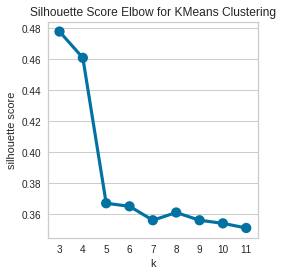

In [ ]:
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(feat_scaled, 3, 12)

In [ ]:
# Define a function to calculate and plot specified # of clusters
def cluster_draw(df, clusters_number):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        end : int. Ending range of kmeans to test.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''   
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = df.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], 
                    hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new, cluster_labels

(               0         1         2  ...        19        20  Cluster
 0      -0.578266 -0.177328 -0.505196  ... -0.489630 -0.239581        1
 1       0.328152 -0.177328 -0.328144  ...  1.527293 -0.239581        1
 2      -0.258354 -0.177328 -0.505196  ... -0.297542 -0.239581        1
 3      -0.418310 -0.177328 -0.328144  ... -0.297542 -0.239581        1
 4      -0.471628 -0.177328 -0.505196  ... -0.393586 -0.239581        1
 ...          ...       ...       ...  ...       ...       ...      ...
 206204 -0.471628 -0.177328 -0.328144  ... -0.201498  0.474915        1
 206205  3.473953  0.830267 -0.328144  ... -0.009410 -0.239581        0
 206206  0.541426 -0.177328 -0.239619  ...  0.278722 -0.239581        0
 206207  0.808020 -0.177328  4.983398  ...  2.199601  1.189411        2
 206208 -0.471628 -0.177328  0.291536  ...  0.086634 -0.239581        1
 
 [206209 rows x 22 columns], array([1, 1, 1, ..., 0, 2, 1], dtype=int32))

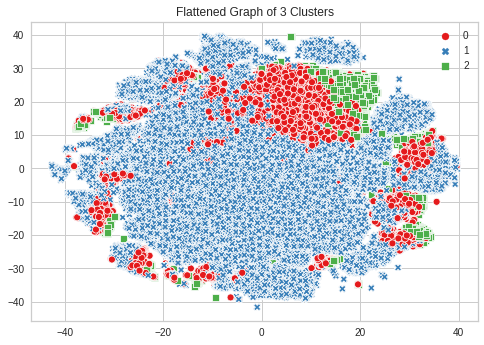

In [ ]:
# 分群t-SNE繪圖
cluster_draw(feat_scaled, 3)

(               0         1         2  ...        19        20  Cluster
 0      -0.578266 -0.177328 -0.505196  ... -0.489630 -0.239581        0
 1       0.328152 -0.177328 -0.328144  ...  1.527293 -0.239581        0
 2      -0.258354 -0.177328 -0.505196  ... -0.297542 -0.239581        0
 3      -0.418310 -0.177328 -0.328144  ... -0.297542 -0.239581        0
 4      -0.471628 -0.177328 -0.505196  ... -0.393586 -0.239581        0
 ...          ...       ...       ...  ...       ...       ...      ...
 206204 -0.471628 -0.177328 -0.328144  ... -0.201498  0.474915        0
 206205  3.473953  0.830267 -0.328144  ... -0.009410 -0.239581        3
 206206  0.541426 -0.177328 -0.239619  ...  0.278722 -0.239581        3
 206207  0.808020 -0.177328  4.983398  ...  2.199601  1.189411        1
 206208 -0.471628 -0.177328  0.291536  ...  0.086634 -0.239581        0
 
 [206209 rows x 22 columns], array([0, 0, 0, ..., 3, 1, 0], dtype=int32))

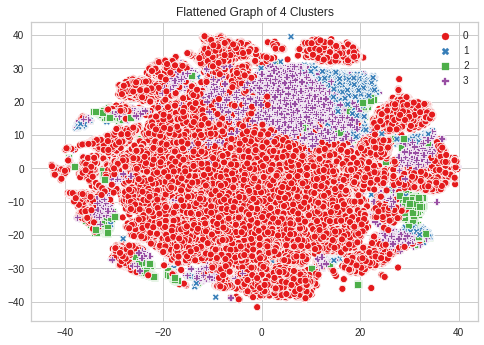

In [ ]:
cluster_draw(feat_scaled, 4)

(               0         1         2  ...        19        20  Cluster
 0      -0.578266 -0.177328 -0.505196  ... -0.489630 -0.239581        0
 1       0.328152 -0.177328 -0.328144  ...  1.527293 -0.239581        0
 2      -0.258354 -0.177328 -0.505196  ... -0.297542 -0.239581        0
 3      -0.418310 -0.177328 -0.328144  ... -0.297542 -0.239581        0
 4      -0.471628 -0.177328 -0.505196  ... -0.393586 -0.239581        0
 ...          ...       ...       ...  ...       ...       ...      ...
 206204 -0.471628 -0.177328 -0.328144  ... -0.201498  0.474915        0
 206205  3.473953  0.830267 -0.328144  ... -0.009410 -0.239581        0
 206206  0.541426 -0.177328 -0.239619  ...  0.278722 -0.239581        0
 206207  0.808020 -0.177328  4.983398  ...  2.199601  1.189411        1
 206208 -0.471628 -0.177328  0.291536  ...  0.086634 -0.239581        0
 
 [206209 rows x 22 columns], array([0, 0, 0, ..., 0, 1, 0], dtype=int32))

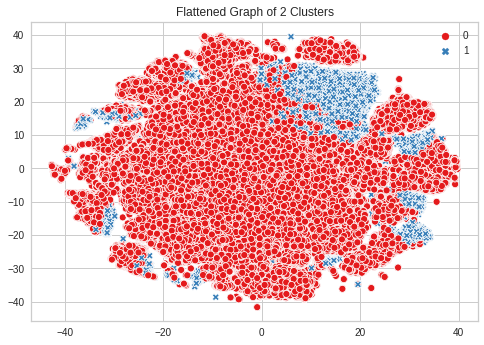

In [ ]:
cluster_draw(feat_scaled, 2)

(               0         1         2  ...        19        20  Cluster
 0      -0.578266 -0.177328 -0.505196  ... -0.489630 -0.239581        0
 1       0.328152 -0.177328 -0.328144  ...  1.527293 -0.239581        0
 2      -0.258354 -0.177328 -0.505196  ... -0.297542 -0.239581        0
 3      -0.418310 -0.177328 -0.328144  ... -0.297542 -0.239581        0
 4      -0.471628 -0.177328 -0.505196  ... -0.393586 -0.239581        0
 ...          ...       ...       ...  ...       ...       ...      ...
 206204 -0.471628 -0.177328 -0.328144  ... -0.201498  0.474915        0
 206205  3.473953  0.830267 -0.328144  ... -0.009410 -0.239581        1
 206206  0.541426 -0.177328 -0.239619  ...  0.278722 -0.239581        1
 206207  0.808020 -0.177328  4.983398  ...  2.199601  1.189411        2
 206208 -0.471628 -0.177328  0.291536  ...  0.086634 -0.239581        0
 
 [206209 rows x 22 columns], array([0, 0, 0, ..., 1, 2, 0], dtype=int32))

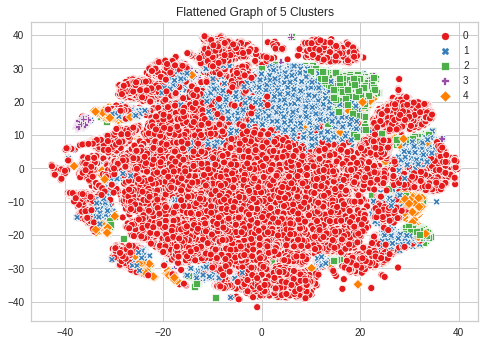

In [ ]:
cluster_draw(feat_scaled, 5)

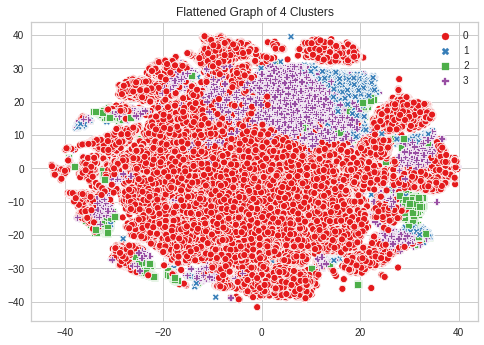

In [20]:
k4, labels = kmeans(feat_scaled, 4)

In [21]:
print(k4)
print(labels)


               0         1         2  ...        19        20  Cluster
0      -0.578266 -0.177328 -0.505196  ... -0.489630 -0.239581        0
1       0.328152 -0.177328 -0.328144  ...  1.527293 -0.239581        0
2      -0.258354 -0.177328 -0.505196  ... -0.297542 -0.239581        0
3      -0.418310 -0.177328 -0.328144  ... -0.297542 -0.239581        0
4      -0.471628 -0.177328 -0.505196  ... -0.393586 -0.239581        0
...          ...       ...       ...  ...       ...       ...      ...
206204 -0.471628 -0.177328 -0.328144  ... -0.201498  0.474915        0
206205  3.473953  0.830267 -0.328144  ... -0.009410 -0.239581        3
206206  0.541426 -0.177328 -0.239619  ...  0.278722 -0.239581        3
206207  0.808020 -0.177328  4.983398  ...  2.199601  1.189411        1
206208 -0.471628 -0.177328  0.291536  ...  0.086634 -0.239581        0

[206209 rows x 22 columns]
[0 0 0 ... 3 1 0]


In [23]:
k4.to_csv("k4.csv", index_label="index")

In [22]:
# Convert clusters to DataFrame with appropriate index and column names
cluster_df = pd.DataFrame(k4)
cluster_df.index = final.index
cluster_df.columns = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", 
                      "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "Cluster"]
cluster_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Cluster
0,-0.578266,-0.177328,-0.505196,-0.576268,-0.123928,-0.397207,-0.001818,-0.107582,-0.524789,-0.138317,-0.408413,-0.490147,-0.57721,-0.053838,-0.536076,-0.317000,-0.179206,-0.17835,0.293481,-0.489630,-0.239581,0
1,0.328152,-0.177328,-0.328144,-0.140227,-0.123928,0.515403,-0.161132,-0.107582,-0.524789,-0.138317,-0.220057,-0.347576,0.13579,-0.053838,-0.432576,0.520044,-0.405745,-0.17835,1.027460,1.527293,-0.239581,0
2,-0.258354,-0.177328,-0.505196,-0.112095,-0.123928,-0.397207,-0.400103,-0.107582,-0.025307,-0.138317,-0.408413,-0.490147,-0.36331,-0.420069,-0.536076,-0.125676,-0.292475,-0.17835,-0.183606,-0.297542,-0.239581,0
3,-0.418310,-0.177328,-0.328144,-0.618465,0.208613,-0.397207,-0.400103,-0.107582,-0.524789,-0.138317,-0.408413,-0.490147,-0.64851,-0.420069,-0.432576,-0.627903,-0.179206,-0.17835,-0.477198,-0.297542,-0.239581,0
4,-0.471628,-0.177328,-0.505196,-0.379346,-0.123928,0.211200,-0.519589,-0.107582,-0.399918,-0.138317,-0.408413,-0.490147,-0.50591,-0.420069,-0.432576,-0.436578,-0.405745,-0.17835,-0.477198,-0.393586,-0.239581,0


In [25]:
# Reshape data for snake plot
cluster_melt = pd.melt(cluster_df.reset_index(), 
                       id_vars=["index", "Cluster"],
                       value_vars=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", 
                                   "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"],
                       var_name="Metric",
                       value_name="Value")

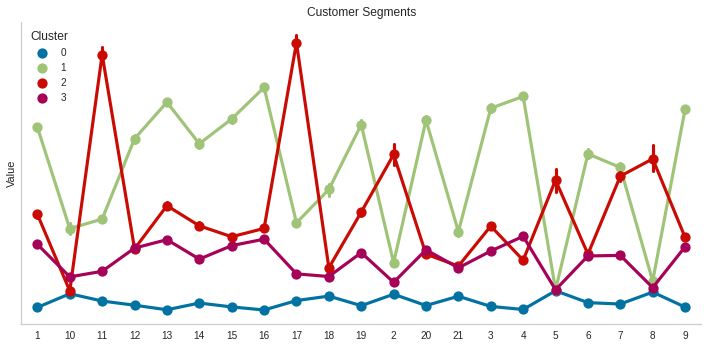

In [26]:
# Create snake plot

plt.figure(figsize=(10,5))
sns.pointplot(x="Metric", y="Value", data=cluster_melt, hue="Cluster")
plt.xlabel("")
plt.ylabel("Value")
plt.yticks([])
plt.title("Customer Segments")
sns.despine()
plt.tight_layout()
plt.savefig("snake_plot.png", dpi=300, pad_inches=2.0)
plt.show();

In [28]:
cluster_df.groupby("Cluster").size()

Cluster
0    159367
1      7026
2      3777
3     36039
dtype: int64